In [ ]:
!pip install japanize-matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=cde043ea27a4e9550889332c6561e146ad0779e89a9254a49fd12a8ac684f9a2
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import csv
import japanize_matplotlib
csv_path = 'data2025-kyoto.csv'

ヘッターとは：「
CSV の 1 行目に書かれた 列名の一覧ラベルみたいな感じ」

列名: ['時間軸（月次）', '日数', '1 食料【円】', 'チョコ【円】', 'アイス【円】', '降水量の合計(mm)', '平均湿度(％)', '日最高気温の平均(℃)', '日照率(％)', '平均風速(m/s)']
行数: 120
期間サンプル: 201501 → 202412
食料_1 日平均円 = [2615.61290323 2942.21428571 2955.06451613 2771.86666667 2797.4516129
 2707.2        2766.         2816.25806452 2747.5        2631.70967742
 2769.16666667 3596.29032258 2532.22580645 2882.51724138 2964.06451613
 2919.53333333 3016.80645161 2822.4        2685.58064516 2726.64516129
 2557.43333333 2525.96774194 2684.26666667 3316.35483871 2535.35483871
 2659.17857143 2656.67741935 2622.46666667 2625.41935484 2602.43333333
 2491.74193548 2643.64516129 2493.56666667 2458.12903226 2606.33333333
 3492.67741935 2654.35483871 2633.17857143 2637.22580645 2626.
 2703.77419355 2654.1        2724.35483871 2972.16129032 2799.6
 2727.12903226 2803.06666667 3078.93548387 2490.5483871  2572.10714286
 2604.41935484 2426.2        2670.61290323 2660.4        2567.48387097
 2480.4516129  2554.56666667 2336.41935484 2634.16666667 3242.74193548
 256

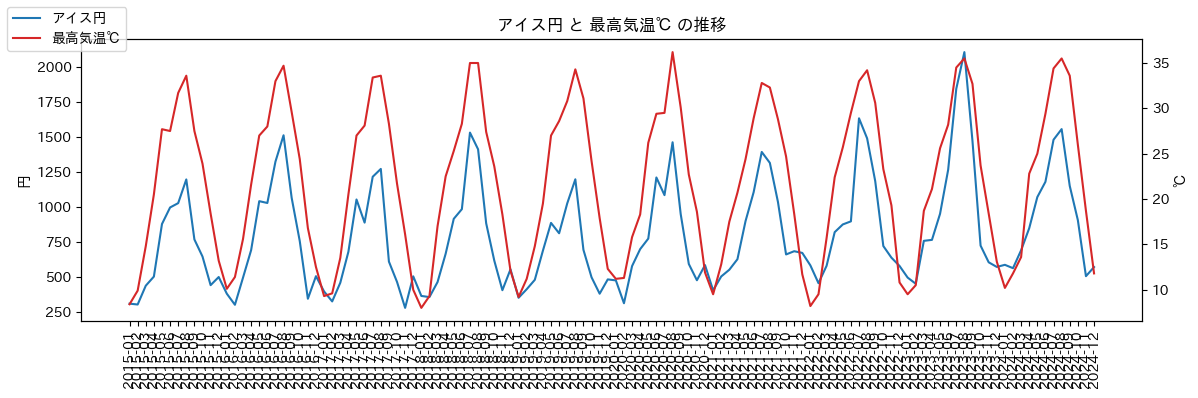

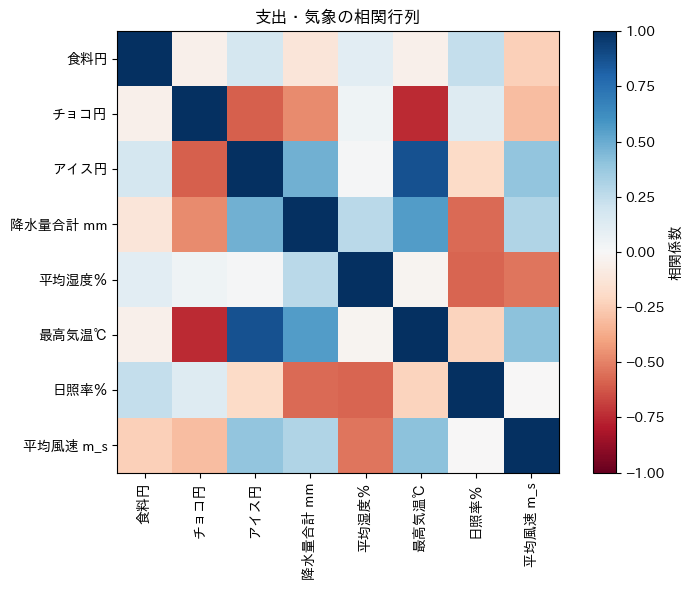

アイス円 平均（夏）: 1262.2
アイス円 平均（冬）: 462.3
チョコ円 平均（降水量 上位 25%）: 315.5
チョコ円 平均（それ以外）: 626.0


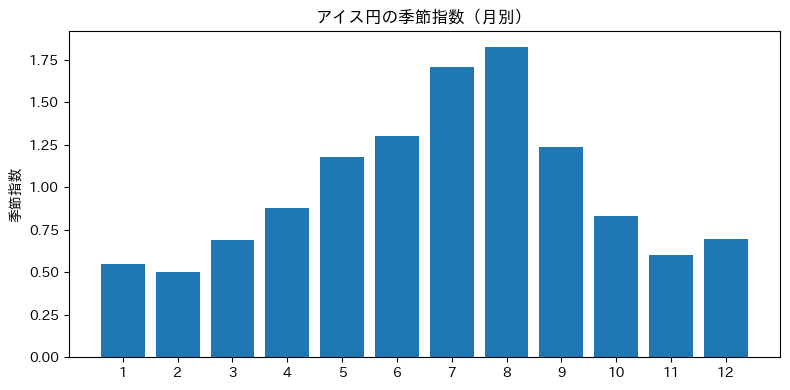

In [ ]:
#CSV読み込み
#with：読み終わったら自動で閉じてくれる
with open(csv_path,"r",encoding="utf-8") as f:

#csv.reader：ファイルを 1 行ずつリストとして読み込む仕組み
  r = csv.reader(f)

#最初の行（ヘッダー）を取り出す
  header = next(r)

#CSVファイルの2行目以降を全部まとめて rows に入れる
#rowはデータリストのリスト
  rows = [row for row in r]

#header の中身を見て,その列が何番目にあるかを辞書にする
col_idx = {name: i for i, name in enumerate(header)}


def to_float_array(col_name):
  i = col_idx[col_name] #列名から列番号を取り出す
  return np.array([float(r[i])for r in rows],dtype = float)

def to_int_array(col_name):
  i = col_idx[col_name]
  return np.array([int(r[i])for r in rows],dtype=float )

#基礎統計を計算する関数 NumPy 配列（arr）を渡すと、そのデータの統計情報をまとめて返す関数。
def describe(arr):
  return {
      'count':arr.size,
      'min':float(np.min(arr)),
      'max':float(np.max(arr)),
      'mwan':float(np.mean(arr)),
      'median':float(np.median(arr)),
      'std':float(np.std(arr)),
  }
#統計を取りたい列のリスト
numeric_keys =[
     '食料円', 'チョコ円', 'アイス円',
    '食料_1 日平均円', 'チョコ_1 日平均円', 'アイス_1 日平均円',
    '降水量合計 mm', '平均湿度％', '最高気温℃',
    '日照率％', '平均風速 m_s'
]

#return np.array([int(r[i]) for r in rows], dtype=float)は
#{
#1.for r in rows これは rows の中から 1 行ずつ取り出すという意味
#1 回目 → r = ["202401", "31", "45000"],2 回目 → r = ["202402", "29", "43000"]

#2.[int(r[i]) for r in rows] これは リスト内包表記と呼ばれる書き方
#result = []
#for r in rows:
#   result.append(int(r[i]))

#3.np.array(..., dtype=float)最後に、作ったリストを NumPy 配列に変換している


#年月処理 リスト内包処理を使用
ym_str = np.array([row[col_idx["時間軸（月次）"]] for row in rows])
years = np.array([int(s[:4]) for s in ym_str],dtype=int)
months = np.array([int(s[4:6])for s in ym_str],dtype=int)

data = {
    '年月文字列': ym_str,
    '年': years,
    '月': months,
    '日数': to_int_array('日数'),
    '食料円': to_float_array('1 食料【円】'),
    'チョコ円': to_float_array('チョコ【円】'),
    'アイス円': to_float_array('アイス【円】'),
    '降水量合計 mm': to_float_array('降水量の合計(mm)'),
    '平均湿度％': to_float_array('平均湿度(％)'),
    '最高気温℃': to_float_array('日最高気温の平均(℃)'),
    '日照率％': to_float_array('日照率(％)'),
    '平均風速 m_s': to_float_array('平均風速(m/s)')
}

print('列名:', header)
print('行数:', len(rows))
print('期間サンプル:', rows[0][col_idx['時間軸（月次）']], '→', rows[-1][col_idx['時間軸（月次）']])

data['食料_1 日平均円'] = data['食料円'] / data['日数']
data['チョコ_1 日平均円'] = data['チョコ円'] / data['日数']
data['アイス_1 日平均円'] = data['アイス円'] / data['日数']

print('食料_1 日平均円 =', data['食料_1 日平均円'])
print('チョコ_1 日平均円 =', data['チョコ_1 日平均円'])
print('アイス_1 日平均円 =', data['アイス_1 日平均円'])

#for 文でまとめて計算
#numeric_keys の中から名前を1つ取り出す
#data[k] でそのデータの NumPy 配列を取り出す
#describe() に渡して統計を計算

for k in numeric_keys:
    stats = describe(data[k])
    print(f'[{k}]', stats)

# 横軸ラベルの作成（YYYY-MM 形式）
labels = np.array([f"{y}-{m:02d}" for y, m in zip(data['年'], data['月'])])

fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(labels, data['アイス円'], color='tab:blue', label='アイス円')
ax1.set_ylabel('円')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(labels, data['最高気温℃'], color='tab:red', label='最高気温℃')
ax2.set_ylabel('℃')

ax1.set_title('アイス円 と 最高気温℃ の推移')
fig.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 行列の作成（列方向 = 特徴量）
features = [
    '食料円', 'チョコ円', 'アイス円',
    '降水量合計 mm', '平均湿度％', '最高気温℃',
    '日照率％', '平均風速 m_s'
]

X = np.vstack([data[k] for k in features])  # shape: (n_features, n_samples)

# 相関行列（各行同士の相関）
C = np.corrcoef(X)

# ヒートマップ
plt.figure(figsize=(8, 6))
plt.imshow(C, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(label='相関係数')
plt.xticks(np.arange(len(features)), features, rotation=90)
plt.yticks(np.arange(len(features)), features)
plt.title('支出・気象の相関行列')
plt.tight_layout()
plt.show()

# 夏（7〜9月）と冬（12,1,2月）の判定
is_summer = (data['月'] >= 7) & (data['月'] <= 9)
is_winter = (data['月'] == 12) | (data['月'] <= 2)

print('アイス円 平均（夏）:', round(np.mean(data['アイス円'][is_summer]), 1))
print('アイス円 平均（冬）:', round(np.mean(data['アイス円'][is_winter]), 1))

# 降水量の上位25%を判定
q75 = np.quantile(data['降水量合計 mm'], 0.75)
high_rain = data['降水量合計 mm'] >= q75

print('チョコ円 平均（降水量 上位 25%）:', round(np.mean(data['チョコ円'][high_rain]), 1))
print('チョコ円 平均（それ以外）:', round(np.mean(data['チョコ円'][~high_rain]), 1))

# 季節指数: 月別平均 / 全体平均
month_means = np.array([np.mean(data['アイス円'][data['月'] == m]) for m in range(1, 13)])
seasonal_index = month_means / np.mean(data['アイス円'])

plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), seasonal_index)
plt.xticks(np.arange(1, 13))
plt.ylabel('季節指数')
plt.title('アイス円の季節指数（月別）')
plt.tight_layout()
plt.show()



**4.1**